# Composite Stress Index (CSI)

We combine fast market stress indicators into a single composite index.
This index is designed for **monitoring and regime classification**, not alpha generation.


## Interpreting the Composite Stress Index (CSI)

The CSI is designed as a monitoring construct, not a trading signal.
It aggregates multiple market stress mechanisms to capture both:
- fast shocks (e.g., volatility repricing)
- slow system strain (e.g., correlation, tail persistence)


In [18]:
import matplotlib.pyplot as plt
from utils.io import load_parquet
from regimes.stress_index import build_composite_stress_index, classify_stress_regimes

stress = load_parquet("processed/stress_indicators.parquet")

In [19]:
csi = build_composite_stress_index(stress, window=120)
regime = classify_stress_regimes(csi)

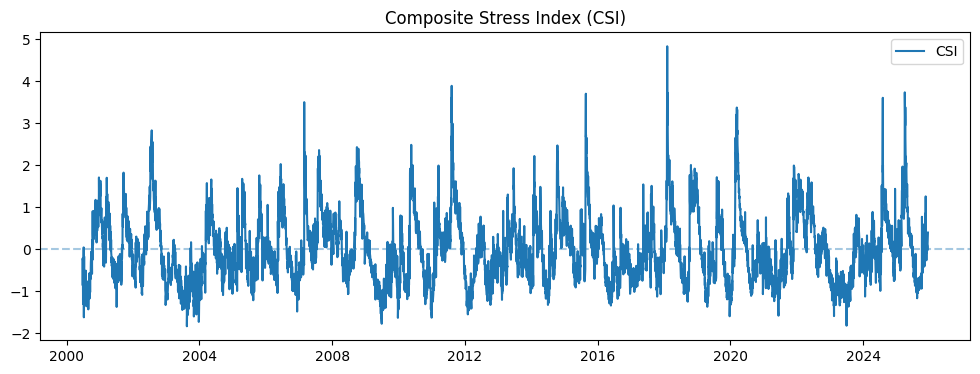

In [20]:
plt.figure(figsize=(12,4))
plt.plot(csi.index, csi, label="CSI")
plt.axhline(0, linestyle="--", alpha=0.4)
plt.title("Composite Stress Index (CSI)")
plt.legend()
plt.show()

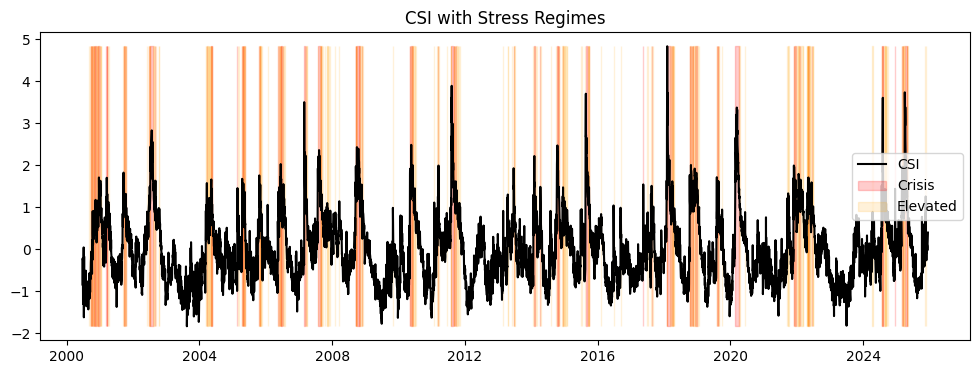

In [21]:
plt.figure(figsize=(12,4))
plt.plot(csi.index, csi, label="CSI", color="black")

plt.fill_between(
    csi.index, csi.min(), csi.max(),
    where=(regime == 2),
    color="red", alpha=0.2, label="Crisis"
)
plt.fill_between(
    csi.index, csi.min(), csi.max(),
    where=(regime == 1),
    color="orange", alpha=0.15, label="Elevated"
)

plt.title("CSI with Stress Regimes")
plt.legend()
plt.show()


In [22]:
regime.value_counts(dropna=True)

stress_regime
0    5380
1     600
2     379
Name: count, dtype: int64

In [23]:
import pandas as pd

pd.DataFrame([{
    "mean": csi.mean(),
    "std": csi.std(),
    "min": csi.min(),
    "max": csi.max(),
}])

,mean,std,min,max
0,-0.027905,0.801201,-1.829213,4.830605
